In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.legend_handler import HandlerTuple
from matplotlib.patches import PathPatch
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
%matplotlib widget


Pricing Strategy: buyout
Using the buyout strategy increases costs by 28350000.00 (1575.00%).

Pricing Strategy: monthly
Using the monthly strategy increases costs by 4350000.00 (241.67%).

Pricing Strategy: daily
Software Revenue: 30000.00
Mean ROI: 1046.51%
Median ROI: 1046.41%
5th Percentile ROI: 872.63%
95th Percentile ROI: 1216.76%

The most optimal pricing strategy for ROI is: daily


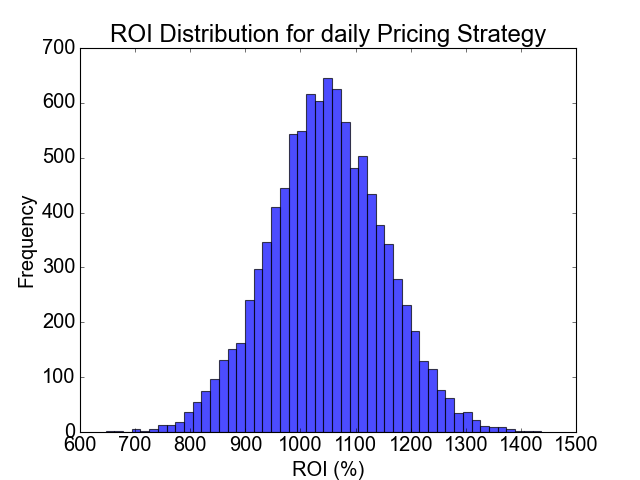

In [11]:
manual_num_people = 3
manual_hours_per_catalog = 200
hourly_wage = 1000
software_num_people = 1
software_hours_per_catalog = 50
catalog_number = 3
software_basiccost = 30000000
monthly_increase_ratio = 1.4  # 按月价格是买断价格的10%涨价
daily_increase_ratio = 1.6   # 按天价格是买断价格的20%涨价
trials = 10000
durations = [12, 1, 1/30]  # 对应于买断、按月和按天的时间长度


def pricing_strategy_cost(software_basiccost, pricing_strategy, monthly_increase_ratio, daily_increase_ratio, duration):
    if pricing_strategy == 'buyout':
        return software_basiccost
    elif pricing_strategy == 'monthly':
        monthly_cost = software_basiccost / 12 * (1 + monthly_increase_ratio)
        return monthly_cost * duration
    elif pricing_strategy == 'daily':
        daily_cost = software_basiccost / 365 * (1 + daily_increase_ratio)
        return daily_cost * duration
    else:
        raise ValueError("Invalid pricing strategy")

def calculate_revenue(software_basiccost, pricing_strategy, monthly_increase_ratio, daily_increase_ratio, duration, catalog_number):
    # 计算软件的收入
    if pricing_strategy == 'buyout':
        return software_basiccost
    elif pricing_strategy == 'monthly':
        monthly_cost = software_basiccost / 12 * (1 + monthly_increase_ratio)
        return monthly_cost * duration * catalog_number
    elif pricing_strategy == 'daily':
        daily_cost = software_basiccost / 260 * (1 + daily_increase_ratio)
        return daily_cost * duration * catalog_number

def calculate_roi(software_cost, catalog_number, manual_num_people, manual_hours_per_catalog, hourly_wage, software_num_people, software_hours_per_catalog, trials=10000):
    manual_costs = manual_num_people * manual_hours_per_catalog * hourly_wage * catalog_number
    software_operation_costs = software_num_people * software_hours_per_catalog * hourly_wage * catalog_number
    total_software_costs = software_operation_costs + software_cost

    cost_savings = manual_costs - total_software_costs
    
    if cost_savings < 0:
        cost_increase = -cost_savings
        cost_increase_percentage = (cost_increase / manual_costs) * 100
        return None, cost_increase, cost_increase_percentage

    savings_distribution = np.random.normal(cost_savings, cost_savings*0.1, trials) # 假设成本节省的标准差为10%
    rois = savings_distribution / total_software_costs * 100
    return rois, None, None




strategies = ['buyout', 'monthly', 'daily']
optimal_strategy = None
highest_roi = float('-inf')
optimal_rois = None


for strategy, duration in zip(strategies, durations):
    software_cost = pricing_strategy_cost(software_basiccost, strategy, monthly_increase_ratio, daily_increase_ratio, duration)
    rois, cost_increase, cost_increase_percentage = calculate_roi(software_cost, catalog_number, manual_num_people, manual_hours_per_catalog, hourly_wage, software_num_people, software_hours_per_catalog, trials)
    revenue = calculate_revenue(software_basiccost, strategy, monthly_increase_ratio, daily_increase_ratio, duration, catalog_number)
    if rois is not None:
        mean = np.mean(rois)
        if mean > highest_roi:
            highest_roi = mean
            optimal_strategy = strategy
            optimal_rois = rois

        print(f"Pricing Strategy: {strategy}")
        print(f"Software Revenue: {revenue:.2f}")
        median = np.median(rois)
        p5 = np.percentile(rois, 5)
        p95 = np.percentile(rois, 95)
        print(f"Mean ROI: {mean:.2f}%")
        print(f"Median ROI: {median:.2f}%")
        print(f"5th Percentile ROI: {p5:.2f}%")
        print(f"95th Percentile ROI: {p95:.2f}%\n")
    else:
        print(f"Pricing Strategy: {strategy}")
        print(f"Using the {strategy} strategy increases costs by {cost_increase:.2f} ({cost_increase_percentage:.2f}%).\n")

print(f"The most optimal pricing strategy for ROI is: {optimal_strategy}")

# 绘制ROI分布的直方图
plt.close('all')
plt.style.use('classic')
fig = plt.figure()
fig.patch.set_facecolor('w')  # 図全体の背景色
plt.rc('font',family='Arial',size=18) # 全局字体
plt.hist(optimal_rois, bins=50, edgecolor='k', alpha=0.7, color='blue')
plt.title(f'ROI Distribution for {optimal_strategy} Pricing Strategy')
plt.xlabel('ROI (%)')
plt.ylabel('Frequency')
plt.show()

Pricing Strategy: buyout
Software Revenue: 200000.00
Mean ROI: 414.33%
Median ROI: 414.81%
5th Percentile ROI: 346.12%
95th Percentile ROI: 482.56%

Pricing Strategy: monthly
Software Revenue: 55000.00
Mean ROI: 968.85%
Median ROI: 968.14%
5th Percentile ROI: 810.02%
95th Percentile ROI: 1127.15%

Pricing Strategy: daily
Software Revenue: 8.22
Mean ROI: 1099.62%
Median ROI: 1100.14%
5th Percentile ROI: 922.48%
95th Percentile ROI: 1279.59%



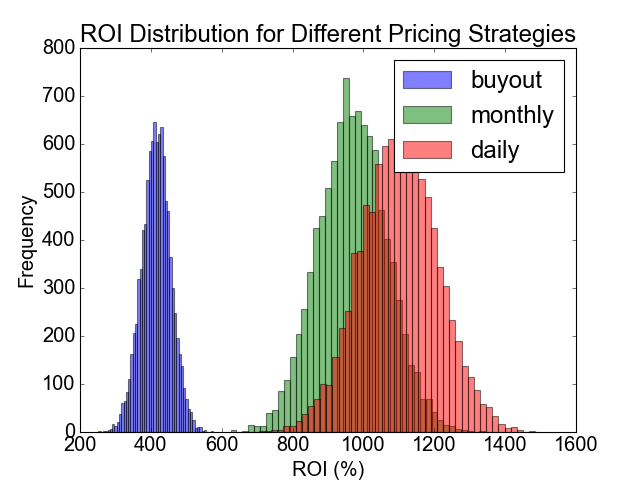

In [15]:
manual_num_people = 3
manual_hours_per_catalog = 200
hourly_wage = 1000
software_num_people = 1
software_hours_per_catalog = 50
catalog_number = 3
software_basiccost = 200000
monthly_increase_ratio = 0.1  # 按月价格是买断价格的10%涨价
daily_increase_ratio = 0.2   # 按天价格是买断价格的20%涨价
trials = 10000

strategies = ['buyout', 'monthly', 'daily']
durations = [12, 1, 1/30]  # Represents durations for each pricing strategy: 12 months for buyout, 1 month for monthly, and 1 day for daily.

roi_results = {}
positive_rois_strategies = []

def pricing_strategy_cost(software_basiccost, pricing_strategy, monthly_increase_ratio, daily_increase_ratio, duration):
    if pricing_strategy == 'buyout':
        return software_basiccost
    elif pricing_strategy == 'monthly':
        monthly_cost = software_basiccost / 12 * (1 + monthly_increase_ratio)
        return monthly_cost * duration
    elif pricing_strategy == 'daily':
        daily_cost = software_basiccost / (260 * 8) * (1 + daily_increase_ratio)  # 按8小时工作日计算
        return daily_cost * duration
    else:
        raise ValueError("Invalid pricing strategy")

def calculate_revenue(software_basiccost, pricing_strategy, monthly_increase_ratio, daily_increase_ratio, duration, catalog_number):
    if pricing_strategy == 'buyout':
        return software_basiccost
    elif pricing_strategy == 'monthly':
        monthly_cost = software_basiccost / 12 * (1 + monthly_increase_ratio)
        return monthly_cost * duration * catalog_number
    elif pricing_strategy == 'daily':
        daily_cost = software_basiccost / (365 * 8) * (1 + daily_increase_ratio)  # 按8小时工作日计算
        return daily_cost * duration * catalog_number

def calculate_roi(software_cost, catalog_number, manual_num_people, manual_hours_per_catalog, hourly_wage, software_num_people, software_hours_per_catalog, trials=10000):
    manual_costs = manual_num_people * manual_hours_per_catalog * hourly_wage * catalog_number
    software_operation_costs = software_num_people * software_hours_per_catalog * hourly_wage * catalog_number
    total_software_costs = software_operation_costs + software_cost

    cost_savings = manual_costs - total_software_costs
    
    if cost_savings < 0:
        cost_increase = -cost_savings
        cost_increase_percentage = (cost_increase / manual_costs) * 100
        return None, cost_increase, cost_increase_percentage

    savings_distribution = np.random.normal(cost_savings, cost_savings*0.1, trials) # 假设成本节省的标准差为10%
    rois = savings_distribution / total_software_costs * 100
    return rois, None, None



for strategy, duration in zip(strategies, durations):
    software_cost = pricing_strategy_cost(software_basiccost, strategy, monthly_increase_ratio, daily_increase_ratio, duration)
    rois, cost_increase, cost_increase_percentage = calculate_roi(software_cost, catalog_number, manual_num_people, manual_hours_per_catalog, hourly_wage, software_num_people, software_hours_per_catalog, trials)
    revenue = calculate_revenue(software_basiccost, strategy, monthly_increase_ratio, daily_increase_ratio, duration, catalog_number)
    
    if rois is not None:
        mean = np.mean(rois)
        roi_results[strategy] = rois  # Store the rois for each strategy
        positive_rois_strategies.append(strategy)
        
        print(f"Pricing Strategy: {strategy}")
        print(f"Software Revenue: {revenue:.2f}")
        median = np.median(rois)
        p5 = np.percentile(rois, 5)
        p95 = np.percentile(rois, 95)
        print(f"Mean ROI: {mean:.2f}%")
        print(f"Median ROI: {median:.2f}%")
        print(f"5th Percentile ROI: {p5:.2f}%")
        print(f"95th Percentile ROI: {p95:.2f}%\n")
    else:
        print(f"Pricing Strategy: {strategy}")
        print(f"Using the {strategy} strategy increases costs by {cost_increase:.2f} ({cost_increase_percentage:.2f}%).\n")

# 绘制所有正ROI的定价策略的ROI分布
plt.close('all')
plt.style.use('classic')
fig = plt.figure()
fig.patch.set_facecolor('w')  # 図全体の背景色
plt.rc('font',family='Arial',size=18) # 全局字体
colors = ['blue', 'green', 'red']
for strategy, color in zip(positive_rois_strategies, colors):
    plt.hist(roi_results[strategy], bins=50, edgecolor='k', alpha=0.5, color=color, label=strategy)
    
plt.title('ROI Distribution for Different Pricing Strategies')
plt.xlabel('ROI (%)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [5]:
test_normal = np.random.normal(3, 3*0.1, 10)
test_normal

array([3.15452589, 3.10122281, 3.23402592, 2.95861822, 3.08827538,
       3.37292159, 2.76049351, 2.99714786, 3.26574491, 2.8997247 ])